In [173]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-06-23 18:56:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.3’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2023-06-23 18:56:46 (5.19 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.3’ saved [178509/178509]



In [174]:
import pandas as pd

df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [176]:
len(df)

2787

In [177]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


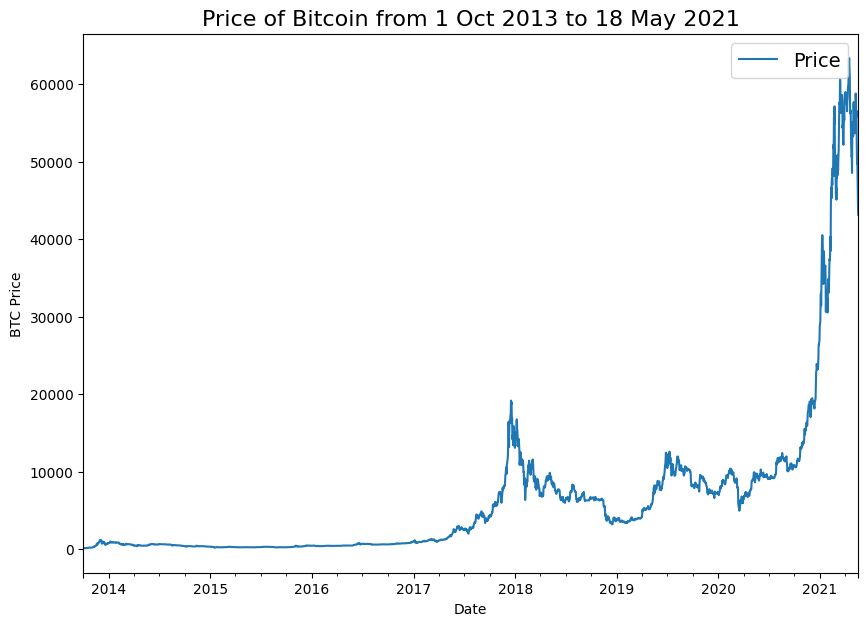

In [178]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14)

In [179]:
from pandas._libs.tslibs import timestamps
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
    btc_price.append(float(line[2]))

timesteps[:10], btc_price[:10]


([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

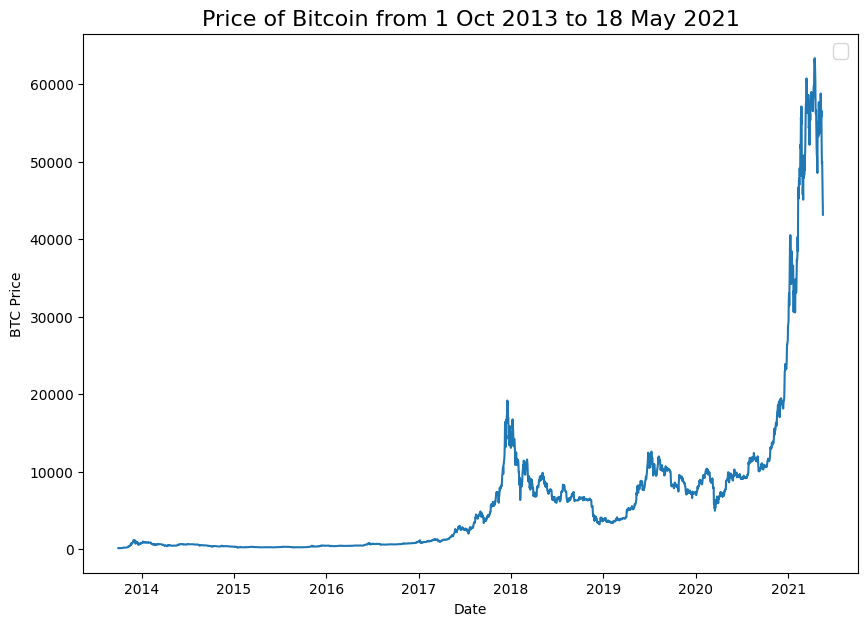

In [180]:
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14)

In [181]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [182]:
split_size = int(0.8 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]

X_test, y_test = timesteps[split_size:], prices[split_size:]

In [183]:
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

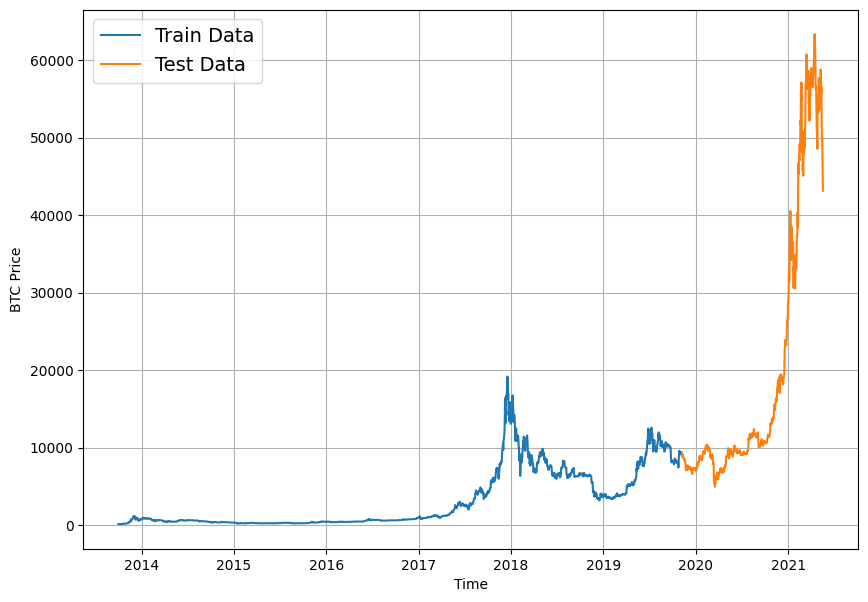

In [184]:
plt.figure(figsize=(10,7))
plot_time_series(X_train, y_train, label="Train Data")
plot_time_series(X_test, y_test, label="Test Data")

# Model 0: Naive Forecast (Baseline)

In [185]:
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [186]:
import tensorflow as tf

In [187]:
def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae / mae_naive_no_season

In [188]:
mean_absolute_scaled_error(y_test[1:], naive_forecast).numpy()

0.9995699939182624

In [189]:
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [190]:
naive_results = evaluate_preds(y_test[1:],naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [191]:
HORIZON = 1
WINDOW_SIZE = 7

In [192]:
def get_labelled_windows(x, horizon=HORIZON):
  return x[:, :-horizon], x[:, -horizon:]

In [193]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [194]:
import numpy as np

In [195]:
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T
  windowed_array = x[window_indexes]
  windows, labels = get_labelled_windows(windowed_array,horizon=horizon)
  return windows, labels

In [196]:
full_windows, full_labels = make_windows(prices)


In [197]:
def make_train_test_splits(windows, labels, test_split=0.2):

  split_size = int(len(windows)*(1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, train_labels, test_windows, test_labels

In [198]:
train_windows, train_labels, test_windows, test_labels = make_train_test_splits(full_windows, full_labels)
train_windows.shape, train_labels.shape

((2224, 7), (2224, 1))

In [199]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

In [200]:
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0,
                                            save_best_only=True)

# Model 1: Dense Model (window = 7, horizon = 1)

In [201]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_1.name)])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 987.3328 - mae: 987.3328 - mse: 3647753.2500  

18/18 [==============================] - 2s 58ms/step - loss: 987.3328 - mae: 987.3328 - mse: 3647753.2500 - val_loss: 2810.7854 - val_mae: 2810.7854 - val_mse: 17394430.0000
Epoch 2/100
12/18 [===================>..........] - ETA: 0s - loss: 287.2397 - mae: 287.2397 - mse: 362835.3438

18/18 [==============================] - 1s 38ms/step - loss: 257.6377 - mae: 257.6377 - mse: 294676.2188 - val_loss: 1087.0337 - val_mae: 1087.0337 - val_mse: 3757813.7500
Epoch 3/100
16/18 [=========================>....] - ETA: 0s - loss: 175.2008 - mae: 175.2008 - mse: 145661.3281

18/18 [==============================] - 1s 38ms/step - loss: 173.2858 - mae: 173.2858 - mse: 147559.2188 - val_loss: 874.7973 - val_mae: 874.7973 - val_mse: 2536015.5000
Epoch 4/100
18/18 [==============================] - 0s 7ms/step - loss: 156.5316 - mae: 156.5316 - mse: 131718.3750 - val_loss: 888.2365 - val_mae: 888.2365 - val_mse: 2448208.0000
Epoch 5/100
17/18 [===========================>..] - ETA: 0s - loss: 153.8018 - mae: 153.8018 - mse: 127681.3203

18/18 [==============================] - 1s 37ms/step - loss: 152.2186 - mae: 152.2186 - mse: 125622.5312 - val_loss: 842.0914 - val_mae: 842.0914 - val_mse: 2360317.7500
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 155.1204 - mae: 155.1204 - mse: 124320.1016 - val_loss: 844.6127 - val_mae: 844.6127 - val_mse: 2205162.0000
Epoch 7/100
16/18 [=========================>....] - ETA: 0s - loss: 152.3682 - mae: 152.3682 - mse: 123382.9531

18/18 [==============================] - 1s 64ms/step - loss: 148.0992 - mae: 148.0992 - mse: 116759.3203 - val_loss: 783.9460 - val_mae: 783.9460 - val_mse: 2050343.1250
Epoch 8/100
15/18 [========================>.....] - ETA: 0s - loss: 138.7862 - mae: 138.7862 - mse: 107651.2266

18/18 [==============================] - 1s 39ms/step - loss: 140.1845 - mae: 140.1845 - mse: 109143.4453 - val_loss: 775.5777 - val_mae: 775.5777 - val_mse: 2016378.0000
Epoch 9/100
17/18 [===========================>..] - ETA: 0s - loss: 142.1546 - mae: 142.1546 - mse: 110564.2031

18/18 [==============================] - 1s 38ms/step - loss: 141.8301 - mae: 141.8301 - mse: 109521.6719 - val_loss: 763.4040 - val_mae: 763.4040 - val_mse: 1887910.5000
Epoch 10/100
13/18 [====================>.........] - ETA: 0s - loss: 131.5556 - mae: 131.5556 - mse: 90092.3203 

18/18 [==============================] - 1s 39ms/step - loss: 136.4919 - mae: 136.4919 - mse: 104789.6016 - val_loss: 738.0934 - val_mae: 738.0934 - val_mse: 1806134.3750
Epoch 11/100
18/18 [==============================] - 0s 6ms/step - loss: 132.0592 - mae: 132.0592 - mse: 98158.9688 - val_loss: 745.6353 - val_mae: 745.6353 - val_mse: 1771357.0000
Epoch 12/100
18/18 [==============================] - 0s 7ms/step - loss: 132.7691 - mae: 132.7691 - mse: 97986.6562 - val_loss: 801.8707 - val_mae: 801.8707 - val_mse: 1895664.7500
Epoch 13/100
17/18 [===========================>..] - ETA: 0s - loss: 133.3621 - mae: 133.3621 - mse: 99059.3359

18/18 [==============================] - 1s 37ms/step - loss: 132.9455 - mae: 132.9455 - mse: 98056.1172 - val_loss: 729.3137 - val_mae: 729.3137 - val_mse: 1681182.2500
Epoch 14/100
15/18 [========================>.....] - ETA: 0s - loss: 122.3189 - mae: 122.3189 - mse: 87576.8438

18/18 [==============================] - 1s 38ms/step - loss: 124.3791 - mae: 124.3791 - mse: 88919.4062 - val_loss: 666.8506 - val_mae: 666.8506 - val_mse: 1498097.7500
Epoch 15/100
17/18 [===========================>..] - ETA: 0s - loss: 126.2489 - mae: 126.2489 - mse: 87488.5625

18/18 [==============================] - 1s 38ms/step - loss: 126.3921 - mae: 126.3921 - mse: 87255.8047 - val_loss: 658.2490 - val_mae: 658.2490 - val_mse: 1490976.0000
Epoch 16/100
16/18 [=========================>....] - ETA: 0s - loss: 118.2786 - mae: 118.2786 - mse: 79894.6250

18/18 [==============================] - 1s 38ms/step - loss: 120.2999 - mae: 120.2999 - mse: 84066.8672 - val_loss: 655.6675 - val_mae: 655.6675 - val_mse: 1445571.8750
Epoch 17/100
18/18 [==============================] - 0s 7ms/step - loss: 119.4549 - mae: 119.4549 - mse: 83858.8203 - val_loss: 664.7554 - val_mae: 664.7554 - val_mse: 1456787.8750
Epoch 18/100
15/18 [========================>.....] - ETA: 0s - loss: 122.9598 - mae: 122.9598 - mse: 87685.6094 

18/18 [==============================] - 1s 46ms/step - loss: 118.6394 - mae: 118.6394 - mse: 82993.7812 - val_loss: 638.4989 - val_mae: 638.4989 - val_mse: 1421836.3750
Epoch 19/100
18/18 [==============================] - 0s 9ms/step - loss: 121.5996 - mae: 121.5996 - mse: 84148.9141 - val_loss: 748.0735 - val_mae: 748.0735 - val_mse: 1653472.5000
Epoch 20/100
10/18 [===============>..............] - ETA: 0s - loss: 126.1596 - mae: 126.1596 - mse: 91251.4609 

18/18 [==============================] - 1s 53ms/step - loss: 118.6334 - mae: 118.6334 - mse: 80755.8750 - val_loss: 627.2170 - val_mae: 627.2170 - val_mse: 1364384.7500
Epoch 21/100
10/18 [===============>..............] - ETA: 0s - loss: 118.9523 - mae: 118.9523 - mse: 75981.7969

18/18 [==============================] - 1s 55ms/step - loss: 118.0483 - mae: 118.0483 - mse: 81115.2812 - val_loss: 621.9523 - val_mae: 621.9523 - val_mse: 1355997.8750
Epoch 22/100
18/18 [==============================] - 0s 9ms/step - loss: 116.7136 - mae: 116.7136 - mse: 80602.5625 - val_loss: 648.5220 - val_mae: 648.5220 - val_mse: 1393177.3750
Epoch 23/100
18/18 [==============================] - 0s 7ms/step - loss: 119.2358 - mae: 119.2358 - mse: 79888.1250 - val_loss: 639.6255 - val_mae: 639.6255 - val_mse: 1406925.6250
Epoch 24/100
16/18 [=========================>....] - ETA: 0s - loss: 118.7497 - mae: 118.7497 - mse: 84770.6016

18/18 [==============================] - 1s 37ms/step - loss: 117.3298 - mae: 117.3298 - mse: 82057.8672 - val_loss: 614.2103 - val_mae: 614.2103 - val_mse: 1331324.5000
Epoch 25/100
18/18 [==============================] - 0s 6ms/step - loss: 115.2848 - mae: 115.2848 - mse: 78447.5938 - val_loss: 620.7788 - val_mae: 620.7788 - val_mse: 1348388.3750
Epoch 26/100
17/18 [===========================>..] - ETA: 0s - loss: 115.3358 - mae: 115.3358 - mse: 75448.6094

18/18 [==============================] - 1s 37ms/step - loss: 115.8837 - mae: 115.8837 - mse: 78921.6562 - val_loss: 610.1927 - val_mae: 610.1927 - val_mse: 1303261.5000
Epoch 27/100
18/18 [==============================] - 0s 7ms/step - loss: 116.8188 - mae: 116.8188 - mse: 78130.9922 - val_loss: 610.2510 - val_mae: 610.2510 - val_mse: 1298987.7500
Epoch 28/100
17/18 [===========================>..] - ETA: 0s - loss: 113.8914 - mae: 113.8914 - mse: 78224.3125

18/18 [==============================] - 1s 38ms/step - loss: 113.6846 - mae: 113.6846 - mse: 77276.4219 - val_loss: 603.0572 - val_mae: 603.0572 - val_mse: 1290634.8750
Epoch 29/100
18/18 [==============================] - 0s 6ms/step - loss: 113.0217 - mae: 113.0217 - mse: 76815.5938 - val_loss: 611.7934 - val_mae: 611.7934 - val_mse: 1293951.1250
Epoch 30/100
18/18 [==============================] - 0s 7ms/step - loss: 117.4901 - mae: 117.4901 - mse: 79111.5078 - val_loss: 606.0792 - val_mae: 606.0792 - val_mse: 1298375.2500
Epoch 31/100
12/18 [===================>..........] - ETA: 0s - loss: 111.4841 - mae: 111.4841 - mse: 72297.3203

18/18 [==============================] - 1s 39ms/step - loss: 113.6330 - mae: 113.6330 - mse: 75403.7344 - val_loss: 598.1711 - val_mae: 598.1711 - val_mse: 1267680.7500
Epoch 32/100
18/18 [==============================] - 0s 6ms/step - loss: 112.9317 - mae: 112.9317 - mse: 76267.3203 - val_loss: 611.9140 - val_mae: 611.9140 - val_mse: 1286911.7500
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 113.9709 - mae: 113.9709 - mse: 75643.4062 - val_loss: 632.6729 - val_mae: 632.6729 - val_mse: 1326018.7500
Epoch 34/100
17/18 [===========================>..] - ETA: 0s - loss: 111.9122 - mae: 111.9122 - mse: 76720.6875 

18/18 [==============================] - 1s 39ms/step - loss: 112.5008 - mae: 112.5008 - mse: 76624.0156 - val_loss: 594.3008 - val_mae: 594.3008 - val_mse: 1262592.5000
Epoch 35/100
18/18 [==============================] - 0s 6ms/step - loss: 111.3754 - mae: 111.3754 - mse: 75192.5781 - val_loss: 608.1140 - val_mae: 608.1140 - val_mse: 1294394.2500
Epoch 36/100
16/18 [=========================>....] - ETA: 0s - loss: 115.9057 - mae: 115.9057 - mse: 78043.0234 

18/18 [==============================] - 1s 59ms/step - loss: 115.7753 - mae: 115.7753 - mse: 76145.4453 - val_loss: 589.8315 - val_mae: 589.8315 - val_mse: 1246291.5000
Epoch 37/100
18/18 [==============================] - 0s 6ms/step - loss: 110.8992 - mae: 110.8992 - mse: 74568.1797 - val_loss: 591.5173 - val_mae: 591.5173 - val_mse: 1244114.3750
Epoch 38/100
18/18 [==============================] - 0s 6ms/step - loss: 113.1263 - mae: 113.1263 - mse: 75490.1797 - val_loss: 652.2006 - val_mae: 652.2006 - val_mse: 1401174.1250
Epoch 39/100
17/18 [===========================>..] - ETA: 0s - loss: 111.7410 - mae: 111.7410 - mse: 74792.5469 

18/18 [==============================] - 1s 39ms/step - loss: 112.0388 - mae: 112.0388 - mse: 74838.8203 - val_loss: 588.6588 - val_mae: 588.6588 - val_mse: 1231983.6250
Epoch 40/100
16/18 [=========================>....] - ETA: 0s - loss: 111.0607 - mae: 111.0607 - mse: 75159.1328

18/18 [==============================] - 1s 37ms/step - loss: 110.5703 - mae: 110.5703 - mse: 73275.6797 - val_loss: 584.8442 - val_mae: 584.8442 - val_mse: 1230329.5000
Epoch 41/100
18/18 [==============================] - 0s 7ms/step - loss: 110.5104 - mae: 110.5104 - mse: 73820.9219 - val_loss: 592.3602 - val_mae: 592.3602 - val_mse: 1252222.6250
Epoch 42/100
18/18 [==============================] - 0s 6ms/step - loss: 113.4547 - mae: 113.4547 - mse: 76657.4922 - val_loss: 634.7538 - val_mae: 634.7538 - val_mse: 1314786.1250
Epoch 43/100
18/18 [==============================] - 0s 7ms/step - loss: 115.4422 - mae: 115.4422 - mse: 73463.0000 - val_loss: 646.1638 - val_mae: 646.1638 - val_mse: 1373123.1250
Epoch 44/100
18/18 [==============================] - 0s 6ms/step - loss: 112.7078 - mae: 112.7078 - mse: 73642.5234 - val_loss: 586.2099 - val_mae: 586.2099 - val_mse: 1219936.1250
Epoch 45/100
16/18 [=========================>....] - ETA: 0s - loss: 108.8782 - mae: 108.8782 - mse: 

18/18 [==============================] - 1s 38ms/step - loss: 109.6700 - mae: 109.6700 - mse: 72768.5000 - val_loss: 581.4102 - val_mae: 581.4102 - val_mse: 1215306.5000
Epoch 46/100
18/18 [==============================] - 0s 7ms/step - loss: 110.9107 - mae: 110.9107 - mse: 72836.4375 - val_loss: 587.0407 - val_mae: 587.0407 - val_mse: 1218381.2500
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 110.6147 - mae: 110.6147 - mse: 73454.2266 - val_loss: 605.0416 - val_mae: 605.0416 - val_mse: 1250933.1250
Epoch 48/100
18/18 [==============================] - 0s 7ms/step - loss: 110.7095 - mae: 110.7095 - mse: 73750.5859 - val_loss: 690.7182 - val_mae: 690.7182 - val_mse: 1442255.5000
Epoch 49/100
17/18 [===========================>..] - ETA: 0s - loss: 121.5388 - mae: 121.5388 - mse: 78182.9531 

18/18 [==============================] - 1s 37ms/step - loss: 120.9199 - mae: 120.9199 - mse: 77598.9453 - val_loss: 580.1937 - val_mae: 580.1937 - val_mse: 1215339.0000
Epoch 50/100
18/18 [==============================] - 0s 7ms/step - loss: 111.1229 - mae: 111.1229 - mse: 73040.6328 - val_loss: 672.1966 - val_mae: 672.1966 - val_mse: 1433168.7500
Epoch 51/100
18/18 [==============================] - 0s 7ms/step - loss: 113.5188 - mae: 113.5188 - mse: 73638.0312 - val_loss: 601.9878 - val_mae: 601.9878 - val_mse: 1241344.8750
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 113.8921 - mae: 113.8921 - mse: 75418.6875 - val_loss: 596.3386 - val_mae: 596.3386 - val_mse: 1245175.0000
Epoch 53/100
18/18 [==============================] - 0s 7ms/step - loss: 110.7469 - mae: 110.7469 - mse: 72736.4453 - val_loss: 636.9004 - val_mae: 636.9004 - val_mse: 1311154.5000
Epoch 54/100
15/18 [========================>.....] - ETA: 0s - loss: 111.9224 - mae: 111.9224 - mse: 

18/18 [==============================] - 1s 45ms/step - loss: 110.4498 - mae: 110.4498 - mse: 71704.5000 - val_loss: 579.8569 - val_mae: 579.8569 - val_mse: 1212331.0000
Epoch 55/100
18/18 [==============================] - 0s 9ms/step - loss: 114.7907 - mae: 114.7907 - mse: 76959.7891 - val_loss: 622.5032 - val_mae: 622.5032 - val_mse: 1278730.2500
Epoch 56/100
18/18 [==============================] - 0s 9ms/step - loss: 113.3987 - mae: 113.3987 - mse: 73123.4609 - val_loss: 792.6852 - val_mae: 792.6852 - val_mse: 1813817.7500
Epoch 57/100
18/18 [==============================] - 0s 9ms/step - loss: 125.4616 - mae: 125.4616 - mse: 84199.2031 - val_loss: 666.4708 - val_mae: 666.4708 - val_mse: 1410430.1250
Epoch 58/100
18/18 [==============================] - 0s 9ms/step - loss: 118.1298 - mae: 118.1298 - mse: 74934.3047 - val_loss: 606.7393 - val_mae: 606.7393 - val_mse: 1246251.3750
Epoch 59/100
18/18 [==============================] - 0s 10ms/step - loss: 112.2694 - mae: 112.2694 - 

18/18 [==============================] - 1s 52ms/step - loss: 111.0838 - mae: 111.0838 - mse: 73912.4531 - val_loss: 575.5624 - val_mae: 575.5624 - val_mse: 1199677.6250
Epoch 62/100
11/18 [=================>............] - ETA: 0s - loss: 101.5678 - mae: 101.5678 - mse: 60476.1133

18/18 [==============================] - 1s 43ms/step - loss: 107.7863 - mae: 107.7863 - mse: 70485.4453 - val_loss: 572.9554 - val_mae: 572.9554 - val_mse: 1184144.8750
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 109.4983 - mae: 109.4983 - mse: 71445.9609 - val_loss: 599.8941 - val_mae: 599.8941 - val_mse: 1227755.7500
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 110.5947 - mae: 110.5947 - mse: 72044.2578 - val_loss: 576.6750 - val_mae: 576.6750 - val_mse: 1190623.2500
Epoch 65/100
18/18 [==============================] - 0s 7ms/step - loss: 108.9808 - mae: 108.9808 - mse: 71667.8438 - val_loss: 576.8250 - val_mae: 576.8250 - val_mse: 1197494.8750
Epoch 66/100
18/18 [==============================] - 0s 6ms/step - loss: 108.0571 - mae: 108.0571 - mse: 70827.6328 - val_loss: 582.9839 - val_mae: 582.9839 - val_mse: 1195590.3750
Epoch 67/100
18/18 [==============================] - 0s 6ms/step - loss: 108.1840 - mae: 108.1840 - m

18/18 [==============================] - 1s 36ms/step - loss: 110.6265 - mae: 110.6265 - mse: 72311.3438 - val_loss: 568.5770 - val_mae: 568.5770 - val_mse: 1177387.5000
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 108.5742 - mae: 108.5742 - mse: 70714.0000 - val_loss: 569.1653 - val_mae: 569.1653 - val_mse: 1170361.1250
Epoch 76/100
18/18 [==============================] - 0s 6ms/step - loss: 109.0824 - mae: 109.0824 - mse: 70916.7969 - val_loss: 574.6212 - val_mae: 574.6212 - val_mse: 1177567.5000
Epoch 77/100
18/18 [==============================] - 0s 6ms/step - loss: 108.8420 - mae: 108.8420 - mse: 70555.7656 - val_loss: 569.1465 - val_mae: 569.1465 - val_mse: 1177344.6250
Epoch 78/100
17/18 [===========================>..] - ETA: 0s - loss: 109.9201 - mae: 109.9201 - mse: 71304.4297

18/18 [==============================] - 1s 36ms/step - loss: 108.8159 - mae: 108.8159 - mse: 70034.0625 - val_loss: 568.1062 - val_mae: 568.1062 - val_mse: 1175633.0000
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 107.8407 - mae: 107.8407 - mse: 70311.9453 - val_loss: 592.6046 - val_mae: 592.6046 - val_mse: 1223464.5000
Epoch 80/100
17/18 [===========================>..] - ETA: 0s - loss: 111.7591 - mae: 111.7591 - mse: 73618.0156 

18/18 [==============================] - 1s 37ms/step - loss: 111.2074 - mae: 111.2074 - mse: 72846.8828 - val_loss: 568.0477 - val_mae: 568.0477 - val_mse: 1166946.2500
Epoch 81/100
18/18 [==============================] - 0s 7ms/step - loss: 106.1645 - mae: 106.1645 - mse: 69564.2812 - val_loss: 578.4840 - val_mae: 578.4840 - val_mse: 1180627.1250
Epoch 82/100
17/18 [===========================>..] - ETA: 0s - loss: 117.1212 - mae: 117.1212 - mse: 77012.0703 

18/18 [==============================] - 1s 36ms/step - loss: 118.1884 - mae: 118.1884 - mse: 78388.6797 - val_loss: 566.6958 - val_mae: 566.6958 - val_mse: 1165505.7500
Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 115.4726 - mae: 115.4726 - mse: 75078.0938 - val_loss: 679.1644 - val_mae: 679.1644 - val_mse: 1436110.6250
Epoch 84/100
18/18 [==============================] - 0s 7ms/step - loss: 114.6329 - mae: 114.6329 - mse: 74324.5859 - val_loss: 569.5325 - val_mae: 569.5325 - val_mse: 1177737.6250
Epoch 85/100
18/18 [==============================] - 0s 7ms/step - loss: 108.8091 - mae: 108.8091 - mse: 71196.7656 - val_loss: 568.3022 - val_mae: 568.3022 - val_mse: 1166794.8750
Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 107.6189 - mae: 107.6189 - mse: 69371.9375 - val_loss: 575.2327 - val_mae: 575.2327 - val_mse: 1176650.3750
Epoch 87/100
18/18 [==============================] - 0s 6ms/step - loss: 107.5783 - mae: 107.5783 - m

18/18 [==============================] - 1s 39ms/step - loss: 107.7562 - mae: 107.7562 - mse: 69744.7109 - val_loss: 566.4308 - val_mae: 566.4308 - val_mse: 1167954.7500
Epoch 90/100
18/18 [==============================] - 0s 6ms/step - loss: 105.6423 - mae: 105.6423 - mse: 67145.1484 - val_loss: 577.0754 - val_mae: 577.0754 - val_mse: 1177991.5000
Epoch 91/100
18/18 [==============================] - 0s 6ms/step - loss: 110.5685 - mae: 110.5685 - mse: 71583.3438 - val_loss: 584.2013 - val_mae: 584.2013 - val_mse: 1205147.0000
Epoch 92/100
18/18 [==============================] - 0s 6ms/step - loss: 109.7006 - mae: 109.7006 - mse: 71920.6484 - val_loss: 604.2149 - val_mae: 604.2149 - val_mse: 1249852.3750
Epoch 93/100
18/18 [==============================] - 0s 7ms/step - loss: 121.8661 - mae: 121.8661 - mse: 77829.4219 - val_loss: 658.0124 - val_mae: 658.0124 - val_mse: 1375045.1250
Epoch 94/100
18/18 [==============================] - 0s 7ms/step - loss: 114.1742 - mae: 114.1742 - m

18/18 [==============================] - 1s 38ms/step - loss: 106.2310 - mae: 106.2310 - mse: 67685.0547 - val_loss: 565.5106 - val_mae: 565.5106 - val_mse: 1164822.3750
Epoch 96/100
18/18 [==============================] - 0s 7ms/step - loss: 107.4555 - mae: 107.4555 - mse: 69223.2969 - val_loss: 627.5597 - val_mae: 627.5597 - val_mse: 1297177.1250
Epoch 97/100
18/18 [==============================] - 0s 7ms/step - loss: 108.8094 - mae: 108.8094 - mse: 71392.4453 - val_loss: 580.2898 - val_mae: 580.2898 - val_mse: 1184402.1250
Epoch 98/100
18/18 [==============================] - 0s 6ms/step - loss: 105.8645 - mae: 105.8645 - mse: 69969.6484 - val_loss: 571.2747 - val_mae: 571.2747 - val_mse: 1170866.1250
Epoch 99/100
16/18 [=========================>....] - ETA: 0s - loss: 108.8184 - mae: 108.8184 - mse: 67969.7031 

18/18 [==============================] - 1s 38ms/step - loss: 110.1077 - mae: 110.1077 - mse: 71273.8672 - val_loss: 564.7190 - val_mae: 564.7190 - val_mse: 1160223.3750
Epoch 100/100
18/18 [==============================] - 0s 7ms/step - loss: 115.8066 - mae: 115.8066 - mse: 71739.0000 - val_loss: 708.3026 - val_mae: 708.3026 - val_mse: 1470427.0000


In [202]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 708.3025 - mae: 708.3025 - mse: 1470427.0000


[708.302490234375, 708.302490234375, 1470427.0]

In [203]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [204]:
model_1 = tf.keras.models.load_model("/content/model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 564.7189 - mae: 564.7189 - mse: 1160223.1250


[564.7188720703125, 564.7188720703125, 1160223.125]

In [205]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [206]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8855.259, 8763.988, 9013.514, 8796.753, 8739.627, 8715.273,
        8689.845, 8518.68 , 8450.593, 8520.328], dtype=float32)>)

In [207]:
model_1_results = evaluate_preds(test_labels, model_1_preds)
model_1_results

{'mae': array([11933.125 , 11800.101 , 11979.257 , 11952.568 , 11958.615 ,
        12009.651 , 12100.216 , 12118.842 , 12078.564 , 12278.532 ,
        12332.511 , 12360.052 , 12663.454 , 12914.443 , 12883.081 ,
        13098.579 , 12953.936 , 13013.1045, 12724.858 , 12819.33  ,
        12585.171 , 12711.742 , 12825.261 , 12860.737 , 12874.139 ,
        12952.419 , 12813.1875, 12732.996 , 12718.798 , 12706.156 ,
        12860.986 , 12931.741 , 12965.186 , 12971.63  , 12932.43  ,
        13059.203 , 13037.137 , 13237.802 , 13514.483 , 12795.129 ,
        13007.611 , 13014.064 , 12895.972 , 12933.897 , 12991.889 ,
        12934.954 , 12953.167 , 12977.129 , 12941.512 , 12876.977 ,
        12822.741 , 12922.804 , 12980.284 , 12984.674 , 13173.917 ,
        12892.281 , 12857.63  , 12850.436 , 12595.423 , 12382.392 ,
        12364.633 , 12532.446 , 12352.069 , 12357.425 , 12313.384 ,
        12333.468 , 11966.374 , 11909.813 , 11979.2   , 11870.239 ,
        11863.406 , 12020.32  , 12012.073

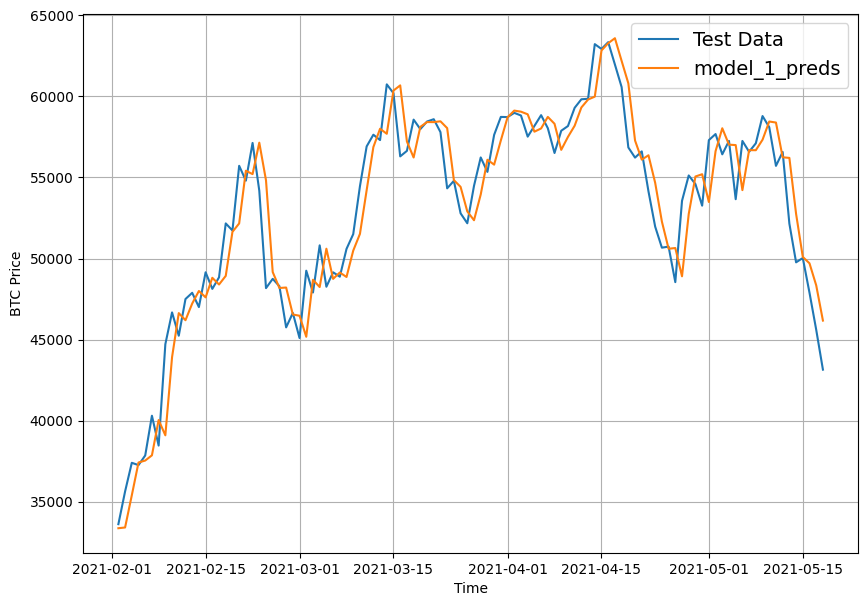

In [208]:
offset = 450
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:],
                 start = offset,
                 label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format="-",
                 label="model_1_preds")

# Model 2: Dense (window = 30, horizon = 1)

In [209]:
HORIZON = 1
WINDOW_SIZE = 30

In [210]:
full_windows, full_labels = make_windows(prices, window_size=30, horizon=HORIZON)

In [211]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows,full_labels,0.2)

In [212]:
test_labels.shape

(552, 1)

In [213]:
train_windows[:3]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
        135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
        160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
        175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
        133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
        164.31499, 177.63333, 188.29

In [214]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
],name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

ValueError: ignored

In [ ]:
model_2.evaluate(test_windows,test_labels)